# 实训二 使用scikit-learn构建模型

sklearn是机器学习中一个常用的python第三方模块，对常用的机器学习算法进行了封装  
其中包括：  
1.分类（Classification）  
2.回归（Regression）  
3.聚类（Clustering）  
4.数据降维（Dimensionality reduction）  
5.常用模型（Model selection）  
6.数据预处理（Preprocessing）  


## 1 使用sklearn转换器处理数据

这个数据集包含了威斯康辛州记录的569个病人的乳腺癌恶性/良性（1/0）类别型数据（训练目标），以及与之对应的30个维度的生理指标数据；因此这是个非常标准的二类判别数据集。

In [1]:
# 代码 6-1
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()##将数据集赋值给iris变量
print('breast_cancer数据集的长度为：',len(cancer))
print('breast_cancer数据集的类型为：',type(cancer))

breast_cancer数据集的长度为： 5
breast_cancer数据集的类型为： <class 'sklearn.utils.Bunch'>


In [5]:
cancer.data[0,:]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [2]:
# 代码 6-2
cancer_data = cancer['data']
print('breast_cancer数据集的数据为：','\n',cancer_data)

cancer_target = cancer['target'] ## 取出数据集的标签
print('breast_cancer数据集的标签为：\n',cancer_target)

cancer_names = cancer['feature_names'] ## 取出数据集的特征名
print('breast_cancer数据集的特征名为：\n',cancer_names)

cancer_desc = cancer['DESCR'] ## 取出数据集的描述信息
print('breast_cancer数据集的描述信息为：\n',cancer_desc)

breast_cancer数据集的数据为： 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
breast_cancer数据集的标签为：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1

In [3]:
# 代码 6-3
print('原始数据集数据的形状为：',cancer_data.shape)
print('原始数据集标签的形状为：',cancer_target.shape)

from sklearn.model_selection import train_test_split
cancer_data_train, cancer_data_test,cancer_target_train, cancer_target_test = train_test_split(cancer_data, cancer_target, test_size=0.2, random_state=42)
print('训练集数据的形状为：',cancer_data_train.shape)
print('训练集标签的形状为：',cancer_target_train.shape)
print('测试集数据的形状为：',cancer_data_test.shape)
print('测试集标签的形状为：',cancer_target_test.shape)

原始数据集数据的形状为： (569, 30)
原始数据集标签的形状为： (569,)
训练集数据的形状为： (455, 30)
训练集标签的形状为： (455,)
测试集数据的形状为： (114, 30)
测试集标签的形状为： (114,)


In [4]:
# 代码 6-4
import numpy as np
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit(cancer_data_train) ##生成规则
##将规则应用于训练集
cancer_trainScaler = Scaler.transform(cancer_data_train) 
##将规则应用于测试集
cancer_testScaler = Scaler.transform(cancer_data_test)
print('离差标准化前训练集数据的最小值为：',np.min(cancer_data_train))
print('离差标准化后训练集数据的最小值为：',np.min(cancer_trainScaler))
print('离差标准化前训练集数据的最大值为：',np.max(cancer_data_train))
print('离差标准化后训练集数据的最大值为：',np.max(cancer_trainScaler))
print('离差标准化前测试集数据的最小值为：',np.min(cancer_data_test))
print('离差标准化后测试集数据的最小值为：',np.min(cancer_testScaler))
print('离差标准化前测试集数据的最大值为：',np.max(cancer_data_test))
print('离差标准化后测试集数据的最大值为：',np.max(cancer_testScaler))

离差标准化前训练集数据的最小值为： 0.0
离差标准化后训练集数据的最小值为： 0.0
离差标准化前训练集数据的最大值为： 4254.0
离差标准化后训练集数据的最大值为： 1.0000000000000002
离差标准化前测试集数据的最小值为： 0.0
离差标准化后测试集数据的最小值为： -0.057127602776294695
离差标准化前测试集数据的最大值为： 3432.0
离差标准化后测试集数据的最大值为： 1.3264399566986453


In [5]:
# 代码 6-5
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2).fit(cancer_trainScaler) ##生成规则
cancer_trainPca = pca_model.transform(cancer_trainScaler) ##将规则应用于训练集
cancer_testPca = pca_model.transform(cancer_testScaler) ##将规则应用于测试集
print('PCA降维前训练集数据的形状为：',cancer_trainScaler.shape)
print('PCA降维后训练集数据的形状为：',cancer_trainPca.shape)
print('PCA降维前测试集数据的形状为：',cancer_testScaler.shape)
print('PCA降维后测试集数据的形状为：',cancer_testPca.shape)

PCA降维前训练集数据的形状为： (455, 30)
PCA降维后训练集数据的形状为： (455, 2)
PCA降维前测试集数据的形状为： (114, 30)
PCA降维后测试集数据的形状为： (114, 2)


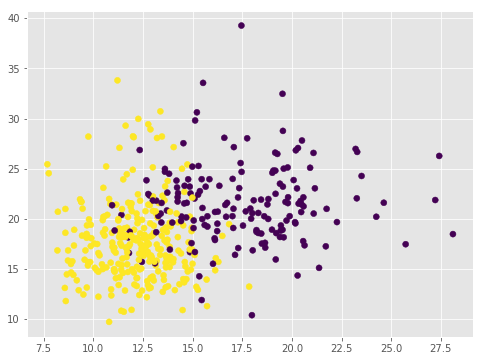

In [7]:
## 可视化
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.style.use("ggplot")
plt.scatter(cancer_data_train[:,0], cancer_data_train[:,1], c=cancer_target_train)

In [6]:
###############################################################################
#######################            任务实现             #######################
###############################################################################

# 代码 6-6
from sklearn.datasets import load_boston
boston = load_boston()
boston_data = boston['data']
boston_target = boston['target']
boston_names = boston['feature_names']
print('boston数据集数据的形状为：',boston_data.shape)
print('boston数据集标签的形状为：',boston_target.shape)
print('boston数据集特征名的形状为：',boston_names.shape)

boston数据集数据的形状为： (506, 13)
boston数据集标签的形状为： (506,)
boston数据集特征名的形状为： (13,)


In [7]:
# 代码 6-7
from sklearn.model_selection import train_test_split
boston_data_train, boston_data_test, \
boston_target_train, boston_target_test = \
train_test_split(boston_data, boston_target, 
    test_size=0.2, random_state=42)
print('训练集数据的形状为：',boston_data_train.shape)
print('训练集标签的形状为：',boston_target_train.shape)
print('测试集数据的形状为：',boston_data_test.shape)
print('测试集标签的形状为：',boston_target_test.shape)

训练集数据的形状为： (404, 13)
训练集标签的形状为： (404,)
测试集数据的形状为： (102, 13)
测试集标签的形状为： (102,)


In [8]:
# 代码 6-8
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler().fit(boston_data_train) ## 生成规则
## 将规则应用于训练集
boston_trainScaler = stdScale.transform(boston_data_train) 
## 将规则应用于测试集
boston_testScaler = stdScale.transform(boston_data_test)
print('标准差标准化后训练集数据的方差为：',np.var(boston_trainScaler))
print('标准差标准化后训练集数据的均值为：',
    np.mean(boston_trainScaler))
print('标准差标准化后测试集数据的方差为：',np.var(boston_testScaler))
print('标准差标准化后测试集数据的均值为：',np.mean(boston_testScaler))

标准差标准化后训练集数据的方差为： 1.0
标准差标准化后训练集数据的均值为： 1.35898739161e-15
标准差标准化后测试集数据的方差为： 0.9475364908
标准差标准化后测试集数据的均值为： 0.0307530028937


In [9]:
# 代码 6-9
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(boston_trainScaler) ## 生成规则
## 将规则应用于训练集
boston_trainPca = pca.transform(boston_trainScaler) 
## 将规则应用于测试集
boston_testPca = pca.transform(boston_testScaler)
print('降维后boston数据集数据测试集的形状为：',boston_trainPca.shape)
print('降维后boston数据集数据训练集的形状为：',boston_testPca.shape)

降维后boston数据集数据测试集的形状为： (404, 5)
降维后boston数据集数据训练集的形状为： (102, 5)


## 2 构建并评价聚类模型

In [1]:
# 代码 6-10
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
iris = load_iris()
iris_data = iris['data'] ##提取数据集中的特征
iris_target = iris['target'] ## 提取数据集中的标签
iris_names = iris['feature_names'] ### 提取特征名
scale = MinMaxScaler().fit(iris_data)## 训练规则
iris_dataScale = scale.transform(iris_data) ## 应用规则
kmeans = KMeans(n_clusters = 3,
    random_state=123).fit(iris_dataScale) ##构建并训练模型
print('构建的K-Means模型为：\n',kmeans)

result = kmeans.predict([[1.5,1.5,1.5,1.5]])
print('花瓣花萼长度宽度全为1.5的鸢尾花预测类别为：', result[0])

构建的K-Means模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)
花瓣花萼长度宽度全为1.5的鸢尾花预测类别为： 0


In [5]:
from sklearn import datasets
from sklearn.cluster import KMeans
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
clf=KMeans(n_clusters=3)
model=clf.fit(X)
 
predicted=model.predict(X)
print(predicted)
print("="*40)
print(y)
print(sum(predicted==y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
134


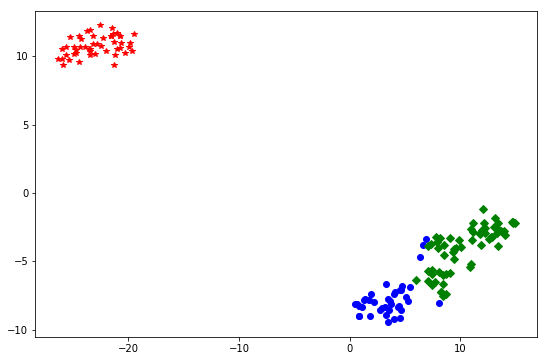

In [11]:
# 代码 6-11
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
##使用TSNE进行数据降维,降成两维
tsne = TSNE(n_components=2,init='random',
    random_state=177).fit(iris_data)
df=pd.DataFrame(tsne.embedding_) ##将原始数据转换为DataFrame
df['labels'] = kmeans.labels_ ##将聚类结果存储进df数据表
##提取不同标签的数据
df1 = df[df['labels']==0]
df2 = df[df['labels']==1] 
df3 = df[df['labels']==2] 
## 绘制图形
fig = plt.figure(figsize=(9,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',
    df3[0],df3[1],'gD')
plt.savefig('tmp/聚类结果.png') 
plt.show() ##显示图片

In [12]:
# 代码 6-12
from sklearn.metrics import fowlkes_mallows_score
for i in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = fowlkes_mallows_score(iris_target,kmeans.labels_)
    print('iris数据聚%d类FMI评价分值为：%f' %(i,score))

iris数据聚2类FMI评价分值为：0.750473
iris数据聚3类FMI评价分值为：0.820808
iris数据聚4类FMI评价分值为：0.753970
iris数据聚5类FMI评价分值为：0.725483
iris数据聚6类FMI评价分值为：0.600691


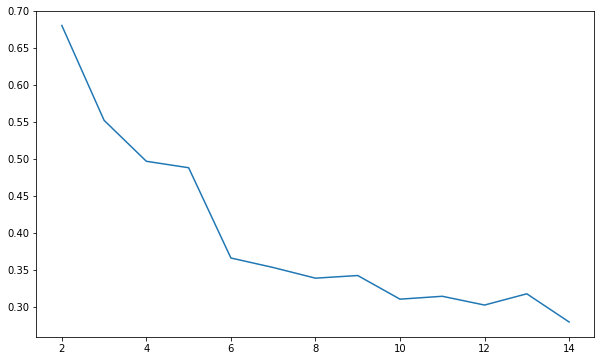

In [13]:
# 代码 6-13
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouettteScore = []
for i in range(2,15):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = silhouette_score(iris_data,kmeans.labels_)
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouettteScore,linewidth=1.5, linestyle="-")
plt.show()

In [14]:
# 代码 6-14
from sklearn.metrics import calinski_harabaz_score
for i in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = calinski_harabaz_score(iris_data,kmeans.labels_)
    print('iris数据聚%d类calinski_harabaz指数为：%f'%(i,score))

iris数据聚2类calinski_harabaz指数为：513.303843
iris数据聚3类calinski_harabaz指数为：560.399924
iris数据聚4类calinski_harabaz指数为：529.120719
iris数据聚5类calinski_harabaz指数为：494.094382
iris数据聚6类calinski_harabaz指数为：474.753604


In [16]:
###############################################################################
#######################            任务实现             #######################
###############################################################################

# 代码 6-15
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
seeds = pd.read_csv('data/seeds_dataset.txt',sep = '\t')
print('数据集形状为：', seeds.shape)
## 处理数据
seeds_data = seeds.iloc[:,:7].values
seeds_target = seeds.iloc[:,7].values
sees_names = seeds.columns[:7]
stdScale = StandardScaler().fit(seeds_data)
seeds_dataScale = stdScale.transform(seeds_data)
##构建并训练模型
kmeans = KMeans(n_clusters = 3,random_state=42).fit(seeds_data)
print('构建的KM-eans模型为：\n',kmeans)

数据集形状为： (210, 8)
构建的KM-eans模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)


In [17]:
# 代码 6-16
from sklearn.metrics import calinski_harabaz_score
for i in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=12).fit(seeds_data)
    score = calinski_harabaz_score(seeds_data,kmeans.labels_)
    print('seeds数据聚%d类calinski_harabaz指数为：%f'%(i,score))

seeds数据聚2类calinski_harabaz指数为：351.179992
seeds数据聚3类calinski_harabaz指数为：375.804961
seeds数据聚4类calinski_harabaz指数为：327.835320
seeds数据聚5类calinski_harabaz指数为：310.331840
seeds数据聚6类calinski_harabaz指数为：302.473069


## 3 构建并评价分类模型

In [18]:
# 代码 6-17
## 加载所需的函数,
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_names = cancer['feature_names']
## 将数据划分为训练集测试集
cancer_data_train,cancer_data_test, \
cancer_target_train,cancer_target_test = \
train_test_split(cancer_data,cancer_target,
      test_size = 0.2,random_state = 22)
## 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)
## 建立SVM模型
svm = SVC().fit(cancer_trainStd,cancer_target_train)
print('建立的SVM模型为：\n',svm)


## 预测训练集结果
cancer_target_pred = svm.predict(cancer_testStd)
print('预测前20个结果为：\n',cancer_target_pred[:20])

建立的SVM模型为：
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
预测前20个结果为：
 [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]


In [19]:
# 代码 6-18
## 求出预测和真实一样的数目
true = np.sum(cancer_target_pred == cancer_target_test )
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', cancer_target_test.shape[0]-true)
print('预测结果准确率为：', true/cancer_target_test.shape[0])

预测对的结果数目为： 111
预测错的的结果数目为： 3
预测结果准确率为： 0.973684210526


In [20]:
# 代码 6-19
from sklearn.metrics import accuracy_score,precision_score, \
recall_score,f1_score,cohen_kappa_score
print('使用SVM预测breast_cancer数据的准确率为：',
      accuracy_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的精确率为：',
      precision_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的召回率为：',
      recall_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的F1值为：',
      f1_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的Cohen’s Kappa系数为：',
      cohen_kappa_score(cancer_target_test,cancer_target_pred))

使用SVM预测breast_cancer数据的准确率为： 0.973684210526
使用SVM预测breast_cancer数据的精确率为： 0.959459459459
使用SVM预测breast_cancer数据的召回率为： 1.0
使用SVM预测breast_cancer数据的F1值为： 0.979310344828
使用SVM预测breast_cancer数据的Cohen’s Kappa系数为： 0.943208236466


In [21]:
# 代码 6-20
from sklearn.metrics import classification_report
print('使用SVM预测iris数据的分类报告为：','\n',
      classification_report(cancer_target_test,
            cancer_target_pred))

使用SVM预测iris数据的分类报告为： 
              precision    recall  f1-score   support

          0       1.00      0.93      0.96        43
          1       0.96      1.00      0.98        71

avg / total       0.97      0.97      0.97       114



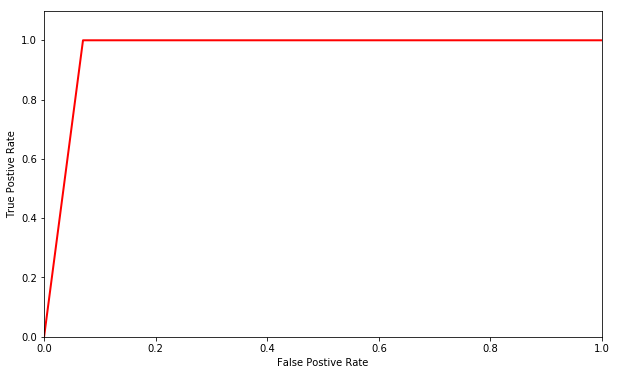

In [22]:
# 代码 6-21
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
## 求出ROC曲线的x轴和y轴
fpr, tpr, thresholds = \
roc_curve(cancer_target_test,cancer_target_pred)
plt.figure(figsize=(10,6))
plt.xlim(0,1) ##设定x轴的范围
plt.ylim(0.0,1.1) ## 设定y轴的范围
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

In [23]:
###############################################################################
#######################           任务实现             #######################
###############################################################################

# 代码 6-22
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
abalone = pd.read_csv('data/abalone.data',sep=',')
## 将数据和标签拆开
abalone_data = abalone.iloc[:,:8]
abalone_target = abalone.iloc[:,8]
## 连续型特征离散化
sex = pd.get_dummies(abalone_data['sex'])
abalone_data = pd.concat([abalone_data,sex],axis = 1 )
abalone_data.drop('sex',axis = 1,inplace = True)
## 划分训练集，测试集
abalone_train,abalone_test, \
abalone_target_train,abalone_target_test = \
train_test_split(abalone_data,abalone_target,
      train_size = 0.8,random_state = 42) 
## 标准化
stdScaler = StandardScaler().fit(abalone_train)
abalone_std_train = stdScaler.transform(abalone_train)
abalone_std_test = stdScaler.transform(abalone_test)
## 建模
svm_abalone = SVC().fit(abalone_std_train,abalone_target_train)
print('建立的SVM模型为：','\n',svm_abalone)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


建立的SVM模型为： 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
# 代码 6-23
abalone_target_pred = svm_abalone.predict(abalone_std_test)
print('abalone数据集的SVM分类报告为：\n',
      classification_report(abalone_target_test,abalone_target_pred))

abalone数据集的SVM分类报告为：
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.45      0.69      0.55        13
          5       0.54      0.22      0.31        32
          6       0.40      0.33      0.36        48
          7       0.41      0.44      0.42        84
          8       0.37      0.36      0.37        99
          9       0.28      0.57      0.38       142
         10       0.24      0.33      0.28       139
         11       0.25      0.25      0.25        93
         12       0.00      0.00      0.00        51
         13       0.00      0.00      0.00        31
         14       0.00      0.00      0.00        26
         15       0.00      0.00      0.00        21
         16       0.00      0.00      0.00        13
         17       0.00      0.00      0.00         8
         18       0.00      0.00      0.00        12
         19       0.00      0.00      0.00         7
         20       0.00 

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 4 构建并评价回归模型

In [25]:
# 代码 6-24
##加载所需函数
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
## 加载boston数据
boston = load_boston()
X = boston['data']
y = boston['target']
names = boston['feature_names']
## 将数据划分为训练集测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=125)
## 建立线性回归模型
clf = LinearRegression().fit(X_train,y_train)
print('建立的LinearRegression模型为：','\n',clf)

## 预测训练集结果
y_pred = clf.predict(X_test)
print('预测前20个结果为：','\n',y_pred[:20])

建立的LinearRegression模型为： 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
预测前20个结果为： 
 [ 21.12953164  19.67578799  22.01735047  24.62046819  14.45164813
  23.32325459  16.6468677   14.9175848   33.58466804  17.48328609
  25.50385719  36.60215179  25.95309333  28.48503161  19.34928078
  20.16966217  25.9788081   18.25959831  16.52754056  17.08448854]


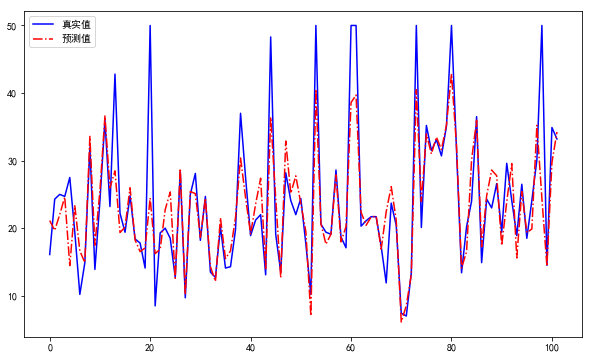

In [26]:
# 代码 6-25
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'SimHei'
fig = plt.figure(figsize=(10,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(range(y_test.shape[0]),y_test,color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(y_test.shape[0]),y_pred,color="red", linewidth=1.5, linestyle="-.")
plt.legend(['真实值','预测值'])
plt.savefig('tmp/聚类结果.png') 
plt.show() ##显示图片

In [27]:
# 代码 6-26
from sklearn.metrics import explained_variance_score,\
mean_absolute_error,\
mean_squared_error,\
median_absolute_error,r2_score
print('Boston数据线性回归模型的平均绝对误差为：',
     mean_absolute_error(y_test,y_pred))
print('Boston数据线性回归模型的均方误差为：',
     mean_squared_error(y_test,y_pred))
print('Boston数据线性回归模型的中值绝对误差为：',
     median_absolute_error(y_test,y_pred))
print('Boston数据线性回归模型的可解释方差值为：',
     explained_variance_score(y_test,y_pred))
print('Boston数据线性回归模型的R方值为：',
     r2_score(y_test,y_pred))

Boston数据线性回归模型的平均绝对误差为： 3.37764269736
Boston数据线性回归模型的均方误差为： 31.1505966769
Boston数据线性回归模型的中值绝对误差为： 1.77742131574
Boston数据线性回归模型的可解释方差值为： 0.710594962628
Boston数据线性回归模型的R方值为： 0.706895422578


In [29]:
###############################################################################
#######################           任务实现             #######################
###############################################################################

# 代码 6-27
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
house = pd.read_csv('data/cal_housing.data',sep=',')
house_data = house.iloc[:,:-1]
house_target = house.iloc[:,-1]
house_names = ['longitude','latitude',
    'housingMedianAge', 'totalRooms',
    'totalBedrooms','population', 
    'households', 'medianIncome']
house_train,house_test,house_target_train,house_target_test = \
train_test_split(house_data,house_target,
    test_size = 0.2, random_state = 42)
GBR_house = GradientBoostingRegressor().fit(house_train,house_target_train)
print('建立的梯度提升回归模型为：','\n',GBR_house)

建立的梯度提升回归模型为： 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [30]:
# 代码 6-28
house_target_pred = GBR_house.predict(house_test)
from sklearn.metrics import explained_variance_score,\
mean_absolute_error,\
mean_squared_error,\
median_absolute_error,r2_score
print('california_housing数据梯度提升回归树模型的平均绝对误差为：',
     mean_absolute_error(house_target_test,house_target_pred))
print('california_housing数据梯度提升回归树模型的均方误差为：',
     mean_squared_error(house_target_test,house_target_pred))
print('california_housing数据梯度提升回归树模型的中值绝对误差为：',
     median_absolute_error(house_target_test,house_target_pred))
print('california_housing数据梯度提升回归树模型的可解释方差值为：',
     explained_variance_score(house_target_test,
        house_target_pred))
print('california_housing数据梯度提升回归树模型的R方值为：',
     r2_score(house_target_test,house_target_pred))

california_housing数据梯度提升回归树模型的平均绝对误差为： 38055.1412072
california_housing数据梯度提升回归树模型的均方误差为： 3103164894.79
california_housing数据梯度提升回归树模型的中值绝对误差为： 26179.4784457
california_housing数据梯度提升回归树模型的可解释方差值为： 0.7619004323
california_housing数据梯度提升回归树模型的R方值为： 0.761852586263


## 习题（操作题）

In [20]:
###############################################################################
########################           第1题             ##########################
###############################################################################
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
iris = data['data']
target = data['target']
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.3, random_state=42)

In [21]:
###############################################################################
########################           第2题             ##########################
###############################################################################

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit(X_train) ##生成规则
X_trainScaler = Scaler.transform(X_train) ##将规则应用于训练集
X_testScaler = Scaler.transform(X_test) ##将规则应用于测试集
pca_model = PCA(n_components=3).fit(X_trainScaler) ##生成规则
X_trainPca = pca_model.transform(X_trainScaler) ##将规则应用于训练集
X_testPca = pca_model.transform(X_testScaler) ##将规则应用于测试集

In [22]:
###############################################################################
########################           第3题             ##########################
###############################################################################

from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm = SVC().fit(X_trainPca,y_train)
print('建立的SVM模型为：\n',svm)
y_pred = svm.predict(X_testPca)
print('使用SVM预测iris数据的结果分析报告为：\n',classification_report(y_test,y_pred))

print(f"正确率：{sum(y_pred==y_test)/len(y_test)*100}%")

建立的SVM模型为：
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
使用SVM预测iris数据的结果分析报告为：
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45

正确率：100.0%


precision recall f1-score三列分别为各个类别的精确度/召回率及 F1值  
当一个搜索引擎返回30个页面时，只有20页是相关的，而没有返回40个额外的相关页面，其精度为20/30 = 2/3，而其召回率为20/60 = 1/3。在这种情况下，精确度是“搜索结果有多大用处”，而召回是“结果如何完整”。

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm = SVC().fit(X_train,y_train)
print('建立的SVM模型为：\n',svm)
y_pred = svm.predict(X_test)
print('使用SVM预测iris数据的结果分析报告为：\n',classification_report(y_test,y_pred))

print(f"正确率：{sum(y_pred==y_test)/len(y_test)*100}%")

建立的SVM模型为：
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
使用SVM预测iris数据的结果分析报告为：
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45

正确率：100.0%


## 补充
### 鸢尾花数据

In [17]:
#导入模块
from sklearn.model_selection import train_test_split
from sklearn import datasets
#k近邻函数
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
#导入数据和标签
iris_X = iris.data
iris_y = iris.target
#划分为训练集和测试集数据
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3)
#print(y_train)
#设置knn分类器
knn = KNeighborsClassifier()
#进行训练
knn.fit(X_train,y_train)
#使用训练好的knn进行数据预测
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)
print(f"正确率：{sum(y_pred==y_test)/len(y_test)*100}%")
print(classification_report(y_test,y_pred))

[0 1 0 2 0 2 2 1 2 2 0 0 1 1 2 0 1 0 1 2 1 1 1 0 1 0 1 0 1 1 0 2 0 1 1 2 1
 2 0 0 1 1 0 0 2]
[0 1 0 2 0 2 2 1 2 2 0 0 1 1 1 0 1 0 1 2 1 1 1 0 2 0 1 0 1 1 0 2 0 1 1 2 1
 2 0 0 1 1 0 0 2]
正确率：95.55555555555556%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.94      0.94      0.94        18
          2       0.91      0.91      0.91        11

avg / total       0.96      0.96      0.96        45



### 波士顿房价数据

In [20]:
#同样首先，我们调用模块
#matplotlib是python专门用于画图的库
import matplotlib.pyplot as plt
from sklearn import datasets
#调用线性回归函数
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#导入数据集
#这里将全部数据用于训练，并没有对数据进行划分，上例中
#将数据划分为训练和测试数据，后面会讲到交叉验证
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target
data_X = StandardScaler().fit_transform(data_X)
pca = PCA(n_components = 1)
data_X = pca.fit_transform(data_X)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=33)
#设置线性回归模块
model = LinearRegression()
#训练数据，得出参数
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
#利用模型，对新数据，进行预测，与原标签进行比较
y_pred = model.predict(X_test)
print(y_test[:10])
print(y_pred[:10])

0.3472860201001363
0.4478847109480875
[20.5  5.6 13.4 12.6 21.2 19.7 32.4 14.8 33.  21.4]
[20.34926642 13.32559767 14.00810976 15.48051264 27.03296161 27.70289121
 28.63182256 22.18702239 29.82629438 20.79128477]


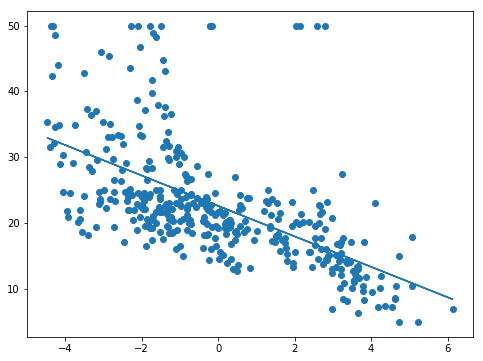

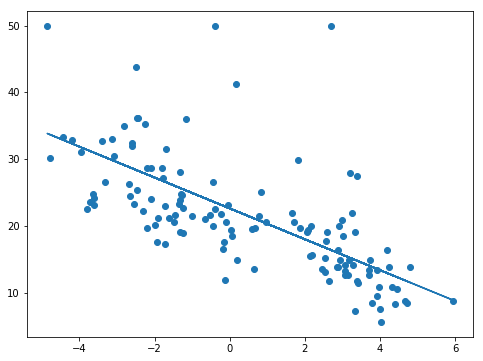

In [21]:
## 绘制图形
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train))
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test))
plt.show()

### 泰坦尼克号存活分析

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 01 09:04:12 2016

@author: Sirius

kaggle上的Titanic经典案例，建立一个模型，预测乘客是否获救，二分类问题
记：寒老师七月算法ML课程课后笔记
"""

import pandas as pd
import numpy as np

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

"""
trian数据集，11个属性+1获救情况
Index 
PassengerId => 乘客ID  --891
Pclass => 乘客等级(1/2/3等舱位) --891 --离散值
Name => 乘客姓名 --891 --文本特征
Sex => 性别 --891 --离散值
Age => 年龄  --714,不全  --连续值
SibSp => 堂兄弟/妹个数 --891 --离散值
Parch => 父母与小孩个数 --891 --离散值
Ticket => 船票信息 --891 --文本信息
Fare => 票价 --891 --连续值
Cabin => 客舱--204，不全 
Embarked => 登船港口 --889 --离散值
"""

"""
   通过对数据进行统计分析，Age和Cabin这两个属性对是否获救的影响很大，因此要设法不全
通常遇到缺值的情况，我们会有几种常见的处理方式：---
   1.如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，
     可能反倒带入noise，影响最后的结果了。
   2.如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，
     那就把NaN作为一个新类别，加到类别特征中。
   3.如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考
     虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，
     然后把它离散化，之后把NaN作为一个type加到属性类目中。
   4.有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。
本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(虽然说没有
    特别多的背景可供我们拟合，这不一定是一个多么好的选择)
"""

#由于Cabin缺失的值较多，因此用方式2处理，有cabin信息则为1，没有则为0
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df
data_train=set_Cabin_type(data_train)

#Age信息缺失适中，通过RandForest拟合
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    #把已有数值型特征喂给RandomForestRegressor
    age_df=df[['Age','Fare','Parch','SibSp','Pclass']]

    known_age=age_df[age_df.Age.notnull()].as_matrix()
    unknown_age=age_df[age_df.Age.isnull()].as_matrix()

    y=known_age[:,0]#目标输出
    X=known_age[:,1:]#输入特征值

    rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X,y)

    predictedAges=rfr.predict(unknown_age[:,1::])

    #y用预测得到的结果填补缺失数据
    df.loc[(df.Age.isnull()),'Age']=predictedAges

    return df,rfr 

data_train,rfr=set_missing_ages(data_train)   


"""
----------------------对离散值特征进行one-hot编码处理----------------------------

以Embarked为例，原本一个属性维度，因为其取值可以是[‘S’,’C’,’Q‘]，而将其平展开为’Embarked_C’,’Embarked_S’, ‘Embarked_Q’三个属性
原本Embarked取值为S的，在此处的”Embarked_S”下取值为1，在’Embarked_C’, ‘Embarked_Q’下取值为0
原本Embarked取值为C的，在此处的”Embarked_C”下取值为1，在’Embarked_S’, ‘Embarked_Q’下取值为0
原本Embarked取值为Q的，在此处的”Embarked_Q”下取值为1，在’Embarked_C’, ‘Embarked_S’下取值为0

"""
#Cabin原本只有yes和no，现在扩展为Cabin_yes和Cabin_no两个属性
dummies_Cabin=pd.get_dummies(data_train['Cabin'],prefix='Cabin')

#Embarked由原来三个值S\C\Q扩展为Embarked_C、Embarked_S、Embarked_C三个属性
dummies_Embarked=pd.get_dummies(data_train['Embarked'],prefix='Embarked')

dummies_Sex=pd.get_dummies(data_train['Sex'],prefix='Sex')

dummies_Pclass=pd.get_dummies(data_train['Pclass'],prefix='Pclass')

df=pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)

df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)



"""
-------------------------对连续值特征进行标准化------------------------
"""
import sklearn.preprocessing as preprocessing
scaler=preprocessing.StandardScaler()
age_scaler_param=scaler.fit(df['Age'])
df['Age_scaled']=scaler.fit_transform(df['Age'],age_scaler_param)

fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)



"""
-----------------------向量化，转为numpy格式矩阵---------------------------
"""
from sklearn import linear_model

train_df=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np=train_df.as_matrix()

y=train_np[:,0]#survival的结果

X=train_np[:,1:]

clf=linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6) #L1正则，惩罚因子1，最终误差在1e-6下
clf.fit(X,y)
model_score=clf.score(X,y) #0.809

"""
------------------对测试集数据进行相同的处理和预测------------------------------

"""

data_test.loc[(data_test.Fare.isnull()),'Fare']=0

tmp_df=data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age=tmp_df[data_test.Age.isnull()].as_matrix()
X1=null_age[:,1:]
#用同样的特征属性X输入到RandomForestRegressor中，填补年龄空缺
predictedAge=rfr.predict(X1)
data_test.loc[(data_test.Age.isnull()),'Age']=predictedAge

data_test=set_Cabin_type(data_test)

dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scaler_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#测试模型
predictions=clf.predict(test)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(),'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions1.csv",index=False)

da=pd.read_csv("logistic_regression_predictions1.csv")




"""
-------------------------通过交叉验证判断模型是否过拟合----------------------------------------
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

#plot_learning_curve(clf, u"学习曲线", X, y)

"""
从learning curve上没有发现过拟合现象（overfitting的表现一般是训练集上得分高，
而交叉验证集上要低很多，中间的gap比较大），因此可以再mining些feature来训练
"""

#通过模型系数theta来查看各个属性与结果的相关程度
pd.DataFrame({"columes":list(train_df.columns)[1:],"coef":list(clf.coef_.T)})
"""
正相关和负相关
                 coef      columes
0     [-0.3442288083]        SibSp
1   [-0.104931485646]        Parch
2               [0.0]     Cabin_No
3    [0.902141633979]    Cabin_Yes  有cabin信息获救几率大
4               [0.0]   Embarked_C
5               [0.0]   Embarked_Q
6   [-0.417262701772]   Embarked_S
7     [1.95657801471]   Sex_female  女性获救几率大，正相关
8   [-0.677418530198]     Sex_male  头等舱获救几率大
9    [0.341141757161]     Pclass_1
10              [0.0]     Pclass_2
11   [-1.19414131133]     Pclass_3
12  [-0.523782222235]   Age_scaled  年龄越小获救的几率越大，负相关
13  [0.0844327966037]  Fare_scaled
"""



"""
-------------一般是把linearRegressor作为baseline，然后使用不同的分类器比如SVM、RadomForest、NN等--------

"""


"""
假设现在模型出现overfitting，那我们干脆就不要用全部的训练集，每次取训练集的一个subset，做训练，这样，
我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，
也是在子训练集上出现过拟合，而不是全体数据上，这样做一个融合，可能对最后的结果有一定的帮助。对，这就是常用的Bagging。
"""

from sklearn.ensemble import BaggingRegressor

train_df=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np=train_df.as_matrix()

y=train_np[:,0]
X=train_np[:,1:]

clf=linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
bagging_clf=BaggingRegressor(clf,n_estimators=10,max_samples=0.8,max_features=1.0,
                             bootstrap=True,bootstrap_features=False,n_jobs=1)
bagging_clf.fit(X,y)


test_df=df.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions=bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions2.csv", index=False)

d:\Anaconda\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
d:\Anaconda\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


ValueError: Expected 2D array, got 1D array instead:
array=[22.         38.         26.         35.         35.         23.83895259
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         32.06649305
 31.         29.51820514 35.         34.         15.         28.
  8.         38.         29.51820514 19.         22.38011324 27.94720616
 40.         36.10804822 35.2958243  66.         28.         42.
 22.87630686 21.         18.         14.         40.         27.
 27.94720616  3.         19.         30.70572678 33.12898535 35.2958243
 23.45968333 18.          7.         21.         49.         29.
 65.         44.06483036 21.         28.5         5.         11.
 22.         38.         45.          4.         41.20008848 17.09991595
 29.         19.         17.         26.         32.         16.
 21.         26.         32.         25.         27.94720616 30.70572678
  0.83       30.         22.         29.         23.32262739 28.
 17.         33.         16.         30.70572678 23.         24.
 29.         20.         46.         26.         59.         30.70572678
 71.         23.         34.         34.         28.         27.94720616
 21.         33.         37.         28.         21.         27.51545426
 38.         33.55117591 47.         14.5        22.         20.
 17.         21.         70.5        29.         24.          2.
 21.         30.70572678 32.5        32.5        54.         12.
 35.2958243  24.         25.78337698 45.         33.         20.
 47.         29.         25.         23.         19.         37.
 16.         24.         25.34409583 22.         24.         19.
 18.         19.         27.          9.         36.5        42.
 51.         22.         55.5        40.5        29.78279613 51.
 16.         30.         25.52340334 10.86986696 44.         40.
 26.         17.          1.          9.         26.03188214 45.
 49.5542756  28.         61.          4.          1.         21.
 56.         18.          7.30954704 50.         30.         36.
 10.86986696 31.71894048  9.          1.          4.         46.24976824
 33.12898535 45.         40.         36.         32.         19.
 19.          3.         44.         58.         35.2958243  42.
 35.2958243  24.         28.         10.86986696 34.         45.5
 18.          2.         32.         26.         16.         40.
 24.         35.         22.         30.         31.09342985 31.
 27.         42.         32.         30.         16.         27.
 51.         27.94720616 38.         22.         19.         20.5
 18.          7.30954704 35.         29.         59.          5.
 24.         31.10838452 44.          8.         19.         33.
 20.80015413 33.12898535 29.         22.         30.         44.
 25.         24.         37.         54.         29.78279613 29.
 62.         30.         41.         29.         34.62028571 30.
 35.         50.         35.2958243   3.         52.         40.
 35.2958243  36.         16.         25.         58.         35.
 36.87489821 25.         41.         37.         35.2958243  63.
 45.         35.05181757  7.         35.         65.         28.
 16.         19.         57.74249226 33.         30.         22.
 42.         22.         26.         19.         36.         24.
 24.         41.20008848 23.5         2.         41.57487718 50.
 35.2958243  23.31368333 19.         42.57451554 30.70572678  0.92
 28.57888393 17.         30.         30.         24.         18.
 26.         28.         43.         26.         24.         54.
 31.         40.         22.         27.         30.         22.
 10.86986696 36.         61.         36.         31.         16.
 23.31368333 45.5        38.         16.         31.42587794 27.94720616
 29.         41.         45.         45.          2.         24.
 28.         25.         36.         24.         40.         26.68916849
  3.         42.         23.         59.96916448 15.         25.
 29.51820514 28.         22.         38.         22.38011324 22.38011324
 40.         29.         45.         35.         33.12898535 30.
 60.         22.87630686 35.2958243  24.         25.         18.
 19.         22.          3.         31.94479345 22.         27.
 20.         19.         42.          1.         32.         35.
 27.94720616 18.          1.         36.         19.89558113 17.
 36.         21.         28.         23.         24.         22.
 31.         46.         23.         28.         39.         26.
 21.         28.         20.         34.         51.          3.
 21.          7.30954704 27.94720616 20.68131488 33.         35.05181757
 44.         30.70572678 34.         18.         30.         10.
 27.94720616 21.         29.         28.         18.         29.78279613
 28.         19.         35.2958243  32.         28.         26.68916849
 42.         17.         50.         14.         21.         24.
 64.         31.         45.         20.         25.         28.
 23.47643239  4.         13.         34.          5.         52.
 36.         24.10899881 30.         49.         30.70572678 29.
 65.         44.06001827 50.         35.2958243  48.         34.
 47.         48.         30.70572678 38.         35.05181757 56.
 19.89558113  0.75       29.78279613 38.         33.         23.
 22.         44.65953056 34.         29.         22.          2.
  9.         35.05181757 50.         63.         25.          7.30954704
 35.         58.         30.          9.         24.10899881 21.
 55.         71.         21.         18.19479484 54.         25.7554753
 25.         24.         17.         21.         26.82073281 37.
 16.         18.         33.         49.8994093  28.         26.
 29.         30.70572678 36.         54.         24.         47.
 34.         34.17374861 36.         32.         30.         22.
 29.51820514 44.         22.87630686 40.5        50.         38.5155
 39.         23.          2.         22.87630686 17.          8.01370298
 30.          7.         45.         30.         24.33021696 22.
 36.          9.         11.         32.         50.         64.
 19.         32.79502428 33.          8.         17.         27.
 26.3814249  22.         22.         62.         48.         38.5155
 39.         36.         35.2958243  40.         28.         30.70572678
 30.70572678 24.         19.         29.         22.87630686 32.
 62.         53.         36.         35.2958243  16.         19.
 34.         39.         20.07016773 32.         25.         39.
 54.         36.         29.04293865 18.         47.         60.
 22.         30.70572678 35.         52.         47.         27.45639428
 37.         36.         24.40235514 49.         29.51820514 49.
 24.         27.94720616 37.51615833 44.         35.         36.
 30.         27.         22.         40.         39.         27.86873699
 33.12898535 35.2958243  35.         24.         34.         26.
  4.         26.         27.         42.         20.         21.
 21.         61.         57.         21.         26.         19.89558113
 80.         51.         32.         38.83477484  9.         28.
 32.         31.         41.         26.68916849 20.         24.
  2.         29.56889809  0.75       48.         19.         56.
 31.10838452 23.         27.94720616 18.         21.         26.3814249
 18.         24.         27.94720616 32.         23.         58.
 50.         40.         47.         36.         20.         32.
 25.         27.51545426 43.         39.08817814 40.         31.
 70.         31.         35.05181757 18.         24.5        18.
 43.         36.         23.47643239 27.         20.         14.
 60.         25.         14.         19.         18.         15.
 31.          4.         29.56889809 25.         60.         52.
 44.         19.89558113 49.         42.         18.         35.
 18.         25.         26.         39.         45.         42.
 22.         17.09991595 24.         49.8994093  48.         29.
 52.         19.         38.         27.         27.30887391 33.
  6.         17.         34.         50.         27.         20.
 30.         19.89558113 25.         25.         29.         11.
 35.05181757 23.         23.         28.5        48.         35.
 27.94720616 27.94720616 38.42663175 36.         21.         24.
 31.         70.         16.         30.         19.         31.
  4.          6.         33.         23.         48.          0.67
 28.         18.         34.         33.         24.33021696 41.
 20.         36.         16.         51.         39.17490238 30.5
 33.55117591 32.         24.         48.         57.         29.51820514
 54.         18.         35.2958243   5.         19.89558113 43.
 13.         17.         29.         16.1939502  25.         25.
 18.          8.          1.         46.         35.2958243  16.
 10.86986696 50.38328427 25.         39.         49.         31.
 30.         30.         34.         31.         11.          0.42
 27.         31.         39.         18.         39.         33.
 26.         39.         35.          6.         30.5        38.83477484
 23.         31.         43.         10.         52.         27.
 38.         27.          2.         35.09787898 29.56889809  1.
 35.2958243  62.         15.          0.83       22.87630686 23.
 18.         39.         21.         30.70572678 32.         50.91095013
 20.         16.         30.         34.5        17.         42.
 10.86986696 35.         28.         43.96476448  4.         74.
  9.         16.         44.         18.         45.         51.
 24.         22.87630686 41.         21.         48.         10.86986696
 24.         42.         27.         31.         25.97788916  4.
 26.         47.         33.         47.         28.         15.
 20.         19.         27.94720616 56.         25.         33.
 22.         28.         25.         39.         27.         19.
 16.1939502  26.         32.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.